Original Dataset

In [13]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [14]:
# load data
data = pd.read_csv("/Users/maryam/hypertension_prediction/Dataset/cleaned_hypertension_data.csv")
data

,Class,Level_of_Hemoglobin,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,Genetic_Pedigree_Coefficient,alcohol_consumption_per_day
0,1,11.28,34,23,1,0,45961,48071,2,1,1,0.90,336.333333
1,0,9.75,54,33,1,0,26106,25333,3,0,0,0.23,205.000000
2,1,10.79,70,49,0,0,9995,29465,2,1,0,0.91,67.000000
3,0,11.00,71,50,0,0,10635,7439,1,1,0,0.43,242.000000
4,1,14.17,52,19,0,0,15619,49644,2,0,0,0.83,397.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,10.14,69,26,1,1,26118,47568,3,1,0,0.02,144.000000
1996,1,11.77,24,45,1,1,2572,8063,3,1,1,1.00,299.666667
1997,1,16.91,18,42,0,0,14933,24753,2,1,1,0.22,369.000000
1998,0,11.15,46,45,1,1,18157,15275,3,0,1,0.72,253.000000


In [15]:

# Prepare data for training
X = data.drop('Class', axis=1)  
y = data['Class']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Create HGB model
hgb_model = HistGradientBoostingClassifier()


In [17]:

# Train and evaluate on original data
hgb_model.fit(X_train, y_train)
y_pred = hgb_model.predict(X_test)
print('Original Data:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Original Data:
Accuracy: 0.875
Precision: 0.839572192513369
Recall: 0.8870056497175142
F1 Score: 0.8626373626373628


 SMOTE for over-sampling

In [18]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate with SMOTE
hgb_model.fit(X_train_smote, y_train_smote)
y_pred_smote = hgb_model.predict(X_test)
print('SMOTE Data:')
print('Accuracy:', accuracy_score(y_test, y_pred_smote))
print('Precision:', precision_score(y_test, y_pred_smote))
print('Recall:', recall_score(y_test, y_pred_smote))
print('F1 Score:', f1_score(y_test, y_pred_smote))

SMOTE Data:
Accuracy: 0.8825
Precision: 0.8385416666666666
Recall: 0.9096045197740112
F1 Score: 0.8726287262872628


Random undersampling

In [19]:
under_sampler = RandomUnderSampler()
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Train and evaluate with random undersampling
hgb_model.fit(X_train_under, y_train_under)
y_pred_under = hgb_model.predict(X_test)
print('Random Under Sampling Data:')
print('Accuracy:', accuracy_score(y_test, y_pred_under))
print('Precision:', precision_score(y_test, y_pred_under))
print('Recall:', recall_score(y_test, y_pred_under))
print('F1 Score:', f1_score(y_test, y_pred_under))


Random Under Sampling Data:
Accuracy: 0.885
Precision: 0.8502673796791443
Recall: 0.8983050847457628
F1 Score: 0.8736263736263736


another sampling teq


In [20]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)
# Train and evaluate with SMOTEENN
hgb_model.fit(X_train_smoteenn, y_train_smoteenn)   
y_pred_smoteenn = hgb_model.predict(X_test) 
print('SMOTEENN Data:')
print('Accuracy:', accuracy_score(y_test, y_pred_smoteenn))
print('Precision:', precision_score(y_test, y_pred_smoteenn))
print('Recall:', recall_score(y_test, y_pred_smoteenn))
print('F1 Score:', f1_score(y_test, y_pred_smoteenn))



SMOTEENN Data:
Accuracy: 0.8825
Precision: 0.8421052631578947
Recall: 0.903954802259887
F1 Score: 0.871934604904632


In [21]:
# Train and evaluate with undersampling before oversampling
under_sampler = RandomUnderSampler()
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
smote = SMOTE()
X_train_under_smote, y_train_under_smote = smote.fit_resample(X_train_under, y_train_under)
hgb_model.fit(X_train_under_smote, y_train_under_smote)
y_pred_under_smote = hgb_model.predict(X_test)
print('Under Sampling + SMOTE Data:')
print('Accuracy:', accuracy_score(y_test, y_pred_under_smote))
print('Precision:', precision_score(y_test, y_pred_under_smote))
print('Recall:', recall_score(y_test, y_pred_under_smote))
print('F1 Score:', f1_score(y_test, y_pred_under_smote))


Under Sampling + SMOTE Data:
Accuracy: 0.875
Precision: 0.839572192513369
Recall: 0.8870056497175142
F1 Score: 0.8626373626373628


Optimal hyperparameters obtained from the grid search:


In [ ]:

# Preparing the data
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_leaf': [20, 40, 60]
}

# Create a HistGradientBoostingClassifier model
hgb_model = HistGradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(hgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 200, 'min_samples_leaf': 20}
Best Score: 0.8999999999999998


Classification Report of the Best Classifier:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       223
           1       0.84      0.89      0.87       177

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



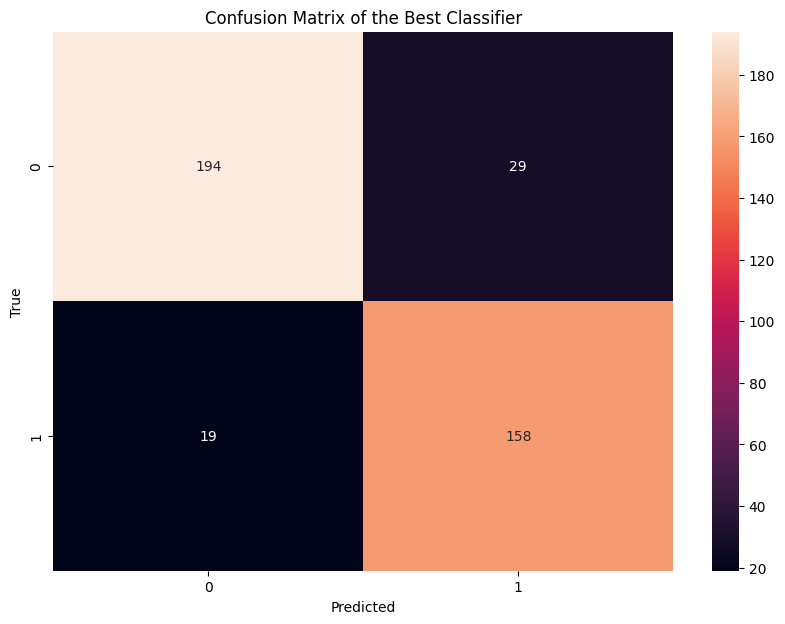

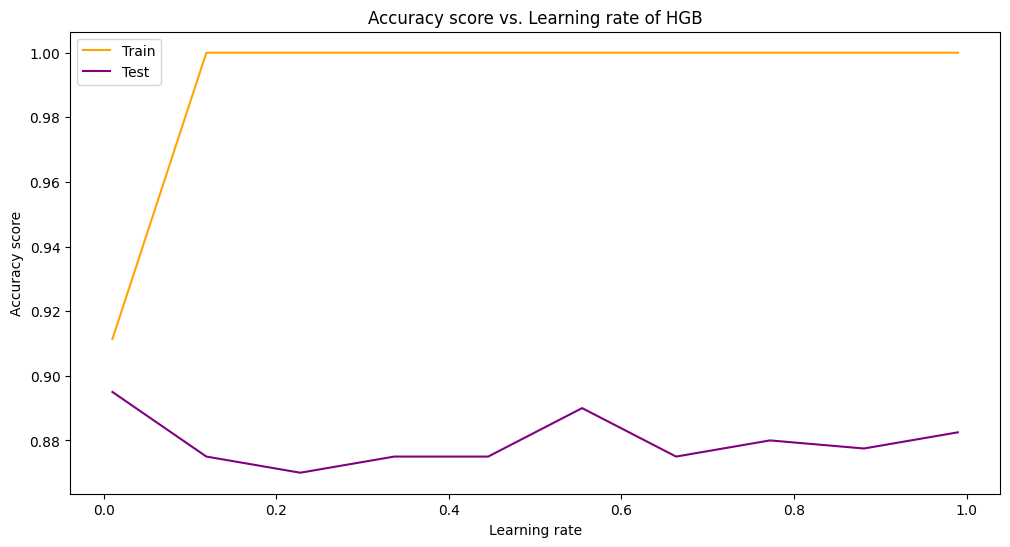

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


# Preparing the data
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
under_sampler = RandomUnderSampler()
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Create a HistGradientBoostingClassifier model with the optimal parameters
hgb_model = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    max_iter=200,
    min_samples_leaf=20,
    random_state=42
)

# Train the model
hgb_model.fit(X_train_under, y_train_under)

# Predict the test set results
y_pred = hgb_model.predict(X_test)

# Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report of the Best Classifier:")
print(report)

# Calculate the confusion matrix and plot it
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of the Best Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot accuracy score vs. learning rate
learning_rates = np.linspace(0.01, 0.99, 10)
train_accuracies = []
test_accuracies = []

for lr in learning_rates:
    model = HistGradientBoostingClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train_under, y_train_under)
    train_accuracies.append(model.score(X_train_under, y_train_under))
    test_accuracies.append(model.score(X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(learning_rates, train_accuracies, label='Train', color='orange')
plt.plot(learning_rates, test_accuracies, label='Test', color='purple')
plt.title('Accuracy score vs. Learning rate of HGB')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()
